In [10]:
import os

import h5py
import numpy as np
import matplotlib.pyplot as plt

import dill

from tqdm import tqdm

from pycbc.psd import aLIGOZeroDetHighPower

import bilby
import bilby_tgr

In [7]:
duration = 2.
sampling_frequency = 4096 #1024.

# Set up a random seed for result reproducibility.  This is optional!
np.random.seed(0)

# Fixed arguments passed into the source model
waveform_arguments = dict(
    waveform_approximant='IMRPhenomPv2',
    reference_frequency=50., 
    minimum_frequency=20.,
    min_match=0.9
 )

# Create the waveform_generator using our beyond-GR source function
waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby_tgr.source.generic_non_gr_binary_black_hole,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=waveform_arguments,
)

# Set up interferometers.  In this case we'll use two interferometers
# (LIGO-Hanford (H1), LIGO-Livingston (L1). These default to their design
# sensitivity
#ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
#ifos.set_strain_data_from_power_spectral_densities(
#    sampling_frequency=sampling_frequency, 
#    duration=duration,
#    start_time=injection_parameters['geocent_time'] - 1
#)

#ifos.inject_signal(waveform_generator=waveform_generator,
#                   parameters=injection_parameters)

10:26 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby_tgr.source.generic_non_gr_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [9]:
import sys
waveform = waveform_generator.frequency_domain_strain(parameters={
    'chirp_mass': 30, 'mass_ratio': 0.8, 'a_1': 0, 'a_2': 0, 'tilt_1': 0, 'tilt_2': 0, 'phi_12': 0, 
    'phi_jl': 0, 'ra': 1.35, 'dec': -1.21, 'geocent_time': 0, 'phase': 0, 'psi': 0, 
    'luminosity_distance': 100, 'theta_jn': 0, 
    'd_phi_0': 0, 'd_phi_1': 0, 'd_phi_2': 0.9, 'd_phi_3': 0, 'd_phi_4': 0, 
    'd_phi_5L': 0, 'd_phi_6': 0, 'd_phi_6L': 0, 'd_phi_7': 0, 'd_alpha_2': 0, 
    'd_alpha_3': 0, 'd_alpha_4': 0, 'd_beta_2': 0, 'd_beta_3': 0
})
sys.getsizeof(waveform)

0.9


ValueError: No inverse ASD passed to the source model, while the minimum overlap > 0 and there are non-zero deviations.

In [11]:
waveform["plus"].shape

(4097,)

In [15]:
sys.getsizeof( dict(
    plus=np.random.normal(loc=0, scale=1, size=4097), 
    cross=np.random.normal(loc=0, scale=1, size=4097) 
) )

232

In [3]:
strain = waveform_generator.time_domain_strain(parameters={
    'chirp_mass': 30, 'mass_ratio': 0.8, 'a_1': 0, 'a_2': 0, 'tilt_1': 0, 'tilt_2': 0, 'phi_12': 0, 
    'phi_jl': 0, 'ra': 1.35, 'dec': -1.21, 'geocent_time': 0, 'phase': 0, 'psi': 0, 
    'luminosity_distance': 100, 'theta_jn': 0, 
    'd_phi_0': 0, 'd_phi_1': 0, 'd_phi_2': 0, 'd_phi_3': 0, 'd_phi_4': 0, 
    'd_phi_5L': 0, 'd_phi_6': 0, 'd_phi_6L': 0, 'd_phi_7': 0, 'd_alpha_2': 0, 
    'd_alpha_3': 0, 'd_alpha_4': 0, 'd_beta_2': 0, 'd_beta_3': 0
})["plus"]

strain_bgr = waveform_generator.time_domain_strain(parameters={
    'chirp_mass': 30, 'mass_ratio': 0.8, 'a_1': 0, 'a_2': 0, 'tilt_1': 0, 'tilt_2': 0, 'phi_12': 0, 
    'phi_jl': 0, 'ra': 1.35, 'dec': -1.21, 'geocent_time': 0, 'phase': 0, 'psi': 0, 
    'luminosity_distance': 100, 'theta_jn': 0, 
    'd_phi_0': 0, 'd_phi_1': 0, 'd_phi_2': 0.2, 'd_phi_3': 0, 'd_phi_4': 0, 
    'd_phi_5L': 0, 'd_phi_6': 0, 'd_phi_6L': 0, 'd_phi_7': 0, 'd_alpha_2': 0, 
    'd_alpha_3': 0, 'd_alpha_4': 0, 'd_beta_2': 0, 'd_beta_3': 0
})["plus"]

strain_m = waveform_generator.time_domain_strain(parameters={
    'chirp_mass': 31, 'mass_ratio': 0.7, 'a_1': 0, 'a_2': 0, 'tilt_1': 0, 'tilt_2': 0, 'phi_12': 0, 
    'phi_jl': 0, 'ra': 1.35, 'dec': -1.21, 'geocent_time': 0, 'phase': 0, 'psi': 0, 
    'luminosity_distance': 100, 'theta_jn': 0, 
    'd_phi_0': 0, 'd_phi_1': 0, 'd_phi_2': 0, 'd_phi_3': 0, 'd_phi_4': 0, 
    'd_phi_5L': 0, 'd_phi_6': 0, 'd_phi_6L': 0, 'd_phi_7': 0, 'd_alpha_2': 0, 
    'd_alpha_3': 0, 'd_alpha_4': 0, 'd_beta_2': 0, 'd_beta_3': 0
})["plus"]
#ax.plot(waveform_generator.time_array[:40], strain[40:] )

/home/noah.wolfe/.conda/envs/testing-gr/lib/python3.8/site-packages/pycbc/types/array.py:200: RuntimeWarning: invalid value encountered in true_divide
  ret = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Strain $\\times 10^{-21}$')

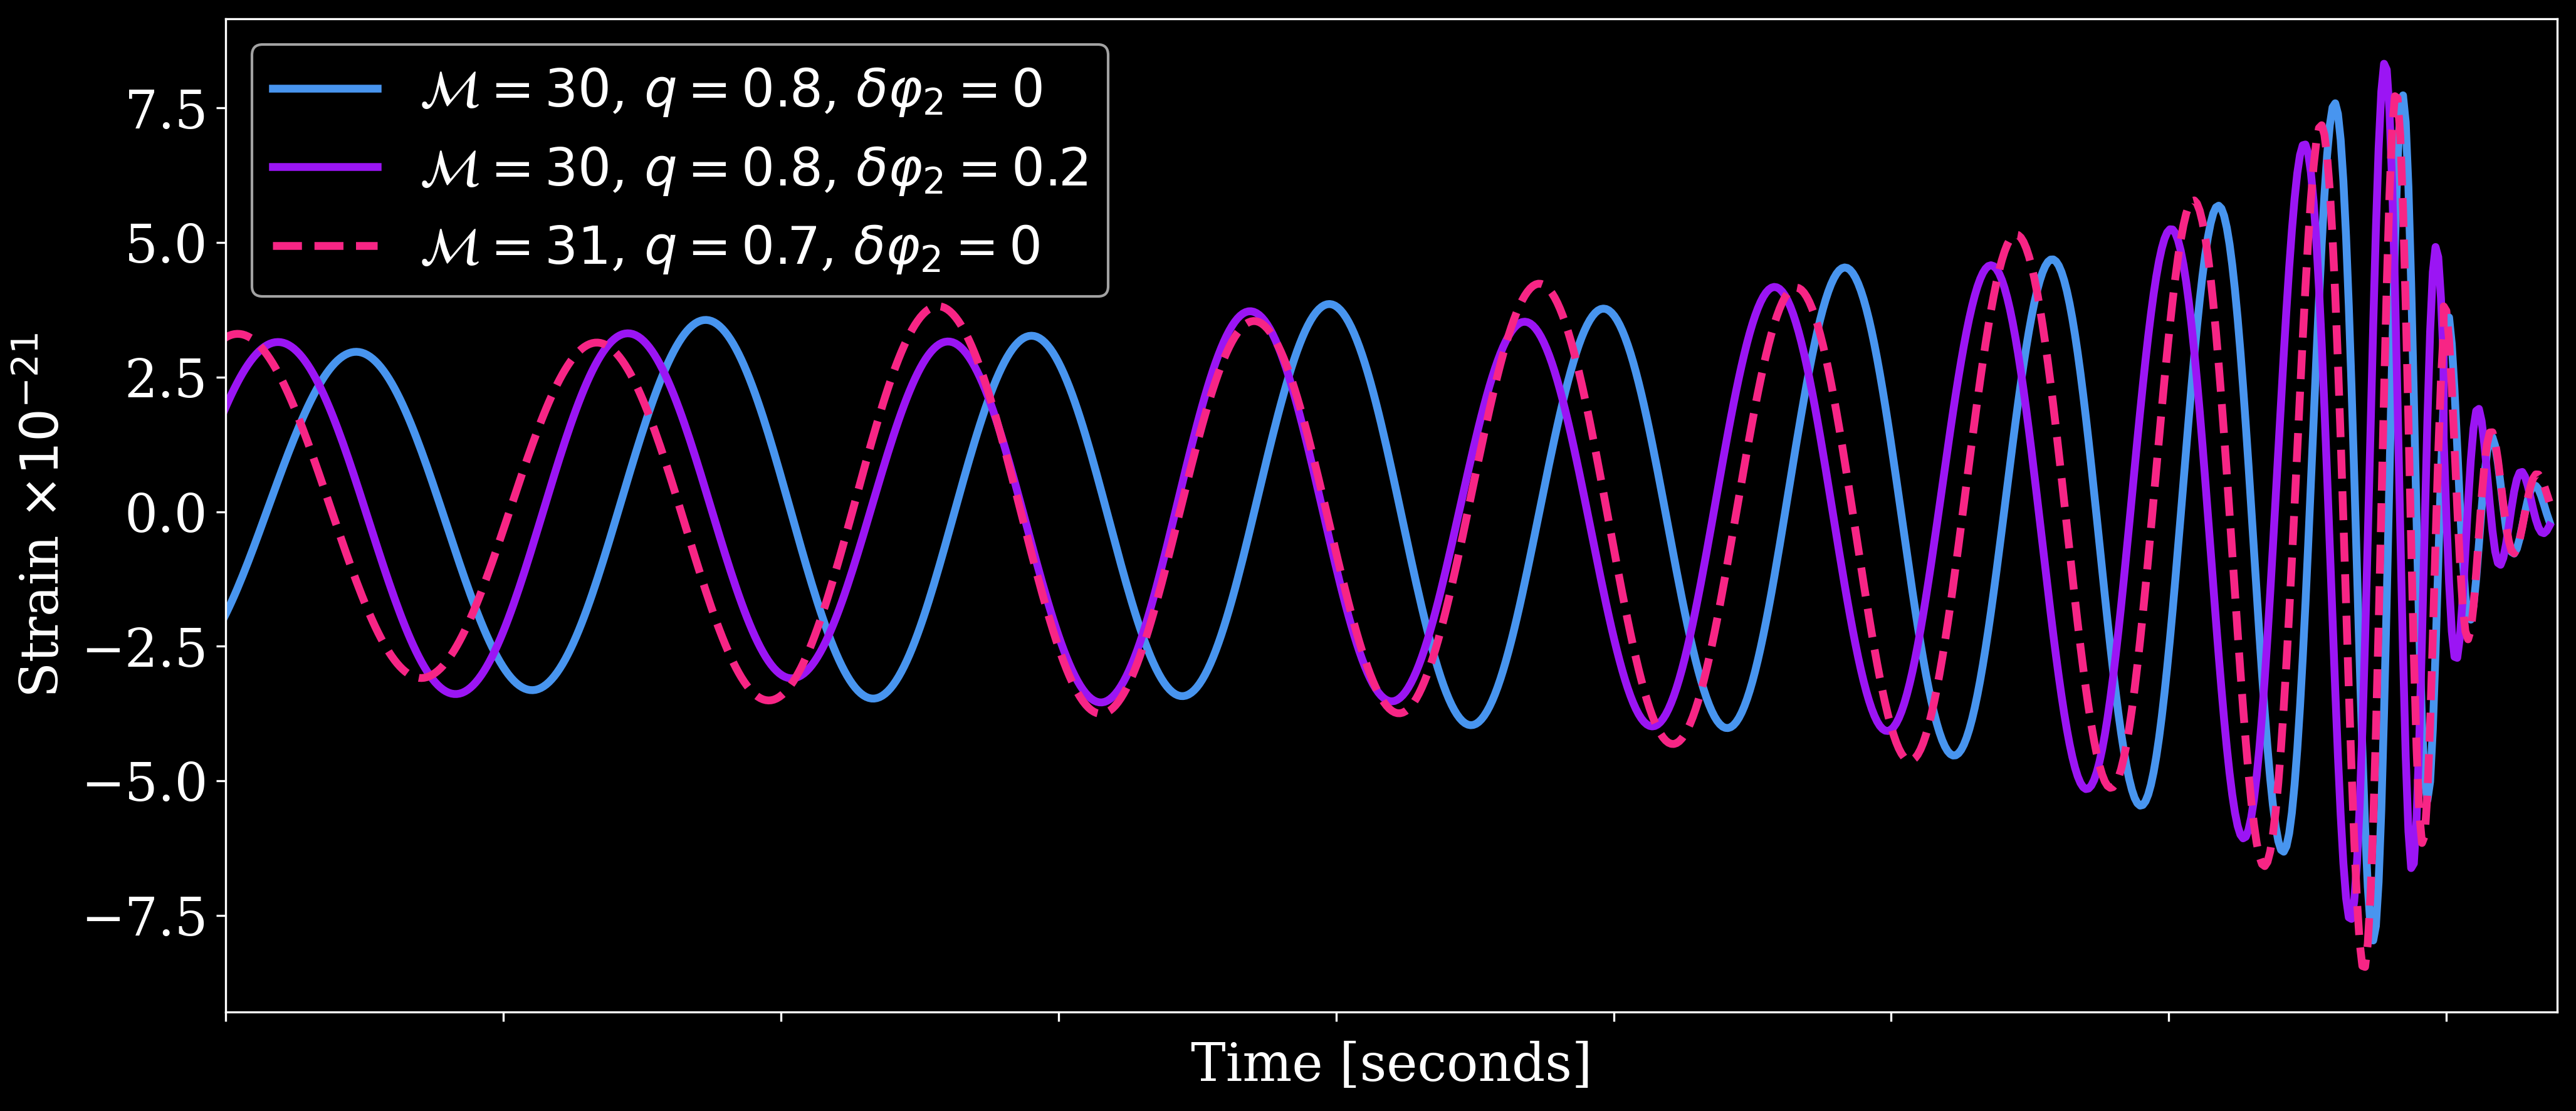

In [7]:
plt.rcParams["font.family"] = "serif"

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(16,7), dpi=300)

def ret_th(strain):
    t = np.concatenate((
        waveform_generator.time_array[40:],
        waveform_generator.time_array[:40] + waveform_generator.time_array[-1],
    ))
    h = np.concatenate((
        strain[40:], strain[:40]
    ))
    return t, h

t, h = ret_th(strain)
t_bgr, h_bgr = ret_th(strain_bgr)
t_m, h_m = ret_th(strain_m)

ax.plot(t, h / 1E-21, linewidth=3, label=r"$\mathcal{M} = 30$, $q = 0.8$, $\delta \varphi_2 = 0$", color="#4895ef")
ax.plot(t_bgr, h_bgr / 1E-21, linewidth=3, label=r"$\mathcal{M} = 30$, $q = 0.8$, $\delta \varphi_2 = 0.2$", color="#9B15F4" )
ax.plot(t_m, h_m / 1E-21, linewidth=3, linestyle="--", label=r"$\mathcal{M} = 31$, $q = 0.7$, $\delta \varphi_2 = 0$", color="#f72585")
ax.set_xlim(1.8,2.01)
plt.legend(prop=dict(size=20))

ax.tick_params(labelsize=20)
ax.set_xticklabels([])

ax.set_xlabel("Time [seconds]", fontsize=20)
ax.set_ylabel(r"Strain $\times 10^{-21}$", fontsize=20)

In [5]:
from contextlib import contextmanager,redirect_stderr,redirect_stdout
from os import devnull

@contextmanager
def suppress_stdout_stderr():
    """A context manager that redirects stdout and stderr to devnull"""
    with open(devnull, 'w') as fnull:
        with redirect_stderr(fnull) as err, redirect_stdout(fnull) as out:
            yield (err, out)

In [12]:
tol = 1E-5

dpi_guess = 0.2
dpi_step = 0.1
direction = 1

while np.abs(dpi_step) > tol:
    print("dpi_guess, dpi_step:", dpi_guess, dpi_step)
    wvf = waveform_generator.frequency_domain_strain(parameters={
        'chirp_mass': 30, 'mass_ratio': 0.8, 'a_1': 0, 'a_2': 0, 'tilt_1': 0, 'tilt_2': 0, 'phi_12': 0, 
        'phi_jl': 0, 'ra': 1.35, 'dec': -1.21, 'geocent_time': 0, 'phase': 0, 'psi': 0, 
        'luminosity_distance': 1000, 'theta_jn': 0, 
        'd_phi_0': 0, 'd_phi_1': 0, 'd_phi_2': dpi_guess, 'd_phi_3': 0, 'd_phi_4': 0, 
        'd_phi_5L': 0, 'd_phi_6': 0, 'd_phi_6L': 0, 'd_phi_7': 0, 'd_alpha_2': 0, 
        'd_alpha_3': 0, 'd_alpha_4': 0, 'd_beta_2': 0, 'd_beta_3': 0
    })
    
    # if wvf is none, dpi_step'd too high!
    if wvf is None:
        dpi_step = -1 * direction * dpi_step * 0.9
    else: # otherwise, dpi_guess is still too low
        dpi_step = direction * dpi_step
        
    dpi_guess += dpi_step

dpi_guess, dpi_step: 0.2 0.1
Calculated match |(-0.21686006772722874+0.899286528105116j)| = 0.9250646186110524; min_match is 0.9
dpi_guess, dpi_step: 0.30000000000000004 0.1
Calculated match |(0.7986465282484673-0.31965451791082117j)| = 0.8602414125721508; min_match is 0.9
dpi_guess, dpi_step: 0.21000000000000002 -0.09000000000000001
Calculated match |(-0.01464174020429294+0.9185127230308169j)| = 0.9186294154476526; min_match is 0.9
dpi_guess, dpi_step: 0.12000000000000001 -0.09000000000000001
Calculated match |(-0.8760356578816615-0.417355943954511j)| = 0.9703733600188725; min_match is 0.9
dpi_guess, dpi_step: 0.03 -0.09000000000000001
Calculated match |(0.7786643976384228-0.6243382485691349j)| = 0.9980563575149365; min_match is 0.9
dpi_guess, dpi_step: -0.06000000000000001 -0.09000000000000001
Calculated match |(0.21631469500028672+0.9684354697412497j)| = 0.9923000082263539; min_match is 0.9
dpi_guess, dpi_step: -0.15000000000000002 -0.09000000000000001
Calculated match |(-0.93098177

In [13]:
dpi_guess

0.25387319410304354

In [8]:
a = np.array([[np.nan, 4], [5, 6]])
b = np.array([[np.nan, 1], [2, 2]])
np.vdot(a,b)

nan

In [22]:
injection_dict = {
    'chirp_mass': 29.272536792667335, 'mass_ratio': 0.6288406547301058, 'a_1': 0, 'a_2': 0, 'tilt_1': 0, 'tilt_2': 0, 'phi_12': 0, 
    'phi_jl': 0, 'ra': 1.35, 'dec': -1.21, 'geocent_time': 0, 'phase': 0, 'psi': 0, 
    'luminosity_distance': 1000, 'theta_jn': 0, 
    'd_phi_0': 0, 'd_phi_1': 0, 'd_phi_2': 0, 'd_phi_3': 0, 'd_phi_4': 0, 
    'd_phi_5L': -0.47236087306929503, 'd_phi_6': 0, 'd_phi_6L': 0, 'd_phi_7': 0, 'd_alpha_2': 0, 
    'd_alpha_3': 0, 'd_alpha_4': 0, 'd_beta_2': 0, 'd_beta_3': 0
}



print( waveform_generator.frequency_domain_strain(parameters=injection_dict) )

None


In [11]:
test_res = bilby.core.result.read_in_result(
    "/home/noah.wolfe/MA499_report_runs/injected/beyond-gr/SNR/beyond-gr_d_phi_2-2E-01_dL-100/beyond-gr_d_phi_2-2E-01_dL-100_hybrid/result/beyond-gr_d_phi_2-2E-01_dL-100_hybrid_data0_0-0_analysis_H1L1_dynesty_d_phi_5L_result.json"
)

In [17]:
test_res.samples[:,10].min()

-0.47236087306929503

In [26]:
test_res.samples[:,10].argmin()

21635

In [54]:
test_dict = {
    'chirp_mass': 29.272536792667335, 'mass_ratio': 0.6288406547301058, 'a_1': 0, 'a_2': 0, 'tilt_1': 0, 'tilt_2': 0, 'phi_12': 0, 
    'phi_jl': 0, 'ra': 1.35, 'dec': -1.21, 'geocent_time': 0, 'phase': 0, 'psi': 0, 
    'luminosity_distance': 1000, 'theta_jn': 0, 
    'd_phi_0': 0, 'd_phi_1': 0, 'd_phi_2': 0.2, 'd_phi_3': 0, 'd_phi_4': 0, 
    'd_phi_5L': -0.3, 'd_phi_6': 0, 'd_phi_6L': 0, 'd_phi_7': 0, 'd_alpha_2': 0, 
    'd_alpha_3': 0, 'd_alpha_4': 0, 'd_beta_2': 0, 'd_beta_3': 0
}

idx = test_res.samples[:,10].argmax()
for i,k in enumerate(test_res.search_parameter_keys):
    test_dict[k] = test_res.samples[idx,i]

In [55]:
print( waveform_generator.frequency_domain_strain(parameters=test_dict) )

None


In [56]:
test_dict

{'chirp_mass': 29.31571181025892,
 'mass_ratio': 0.7297625001014778,
 'a_1': 0.06676557525015721,
 'a_2': 0.025938672326160952,
 'tilt_1': 2.2551460656915396,
 'tilt_2': 1.6306579367141896,
 'phi_12': 0.17555362236929106,
 'phi_jl': 1.7252262376165468,
 'ra': 1.35,
 'dec': -1.21,
 'geocent_time': 0,
 'phase': 0,
 'psi': 2.7400031889563587,
 'luminosity_distance': 1000,
 'theta_jn': 0.07512441020023547,
 'd_phi_0': 0,
 'd_phi_1': 0,
 'd_phi_2': 0.2,
 'd_phi_3': 0,
 'd_phi_4': 0,
 'd_phi_5L': -0.24168668883416528,
 'd_phi_6': 0,
 'd_phi_6L': 0,
 'd_phi_7': 0,
 'd_alpha_2': 0,
 'd_alpha_3': 0,
 'd_alpha_4': 0,
 'd_beta_2': 0,
 'd_beta_3': 0,
 'azimuth': 2.568555687256315,
 'zenith': 2.395949847421034,
 'L1_time': 0.007084055528604829}